# Pymaceuticals Inc.
---

Observations:
1) Of the four treatment regimens, Ceftamin was the least effective at treating tumors seen in mice. 
2) The weight of the mice had a significant impact on the effectiveness of Capomulin regimen. As shown in the scatterplot, mice with heavier weights also were more likely to have a large average tumor size. 
3) The long-term effectiveness of Capomulin must be questioned. When looking at the results of mouse i738, there was a dramatic drop in the tumor size when first given the treatment. However, the tumor size began to increase from its loweest point by the end of the treatment regimen.  

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
combined_data= pd.merge(mouse_metadata, study_results, how='left', on= 'Mouse ID')

# Display the data table for preview

combined_data.head


<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [10]:
# Checking the number of mice.
mouse_count= combined_data['Mouse ID'].value_counts

print(mouse_count)

<bound method IndexOpsMixin.value_counts of 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object>


In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

print(duplicates)

#duplicate is mouse g989

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
107      g989          0           45.000000                 0
137      g989          0           45.000000                 0
329      g989          5           48.786801                 0
360      g989          5           47.570392                 0
620      g989         10           51.745156                 0
681      g989         10           49.880528                 0
815      g989         15           51.325852                 1
869      g989         15           53.442020                 0
950      g989         20           55.326122                 1
1111     g989         20           54.657650                 1


In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

print(duplicates)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
107      g989          0           45.000000                 0
137      g989          0           45.000000                 0
329      g989          5           48.786801                 0
360      g989          5           47.570392                 0
620      g989         10           51.745156                 0
681      g989         10           49.880528                 0
815      g989         15           51.325852                 1
869      g989         15           53.442020                 0
950      g989         20           55.326122                 1
1111     g989         20           54.657650                 1


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data= combined_data.drop_duplicates(subset=["Mouse ID"])

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [32]:
# Checking the number of mice in the clean DataFrame.
clean_count= len(clean_data)
clean_count

249

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean= combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median= combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance= combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation= combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem= combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#summary dataframe
summary_stats= pd.DataFrame({"Mean": mean,
                            "Median": median,
                            "Variance": variance,
                            "Standard Deviation": standard_deviation,
                            "SEM": sem
})
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

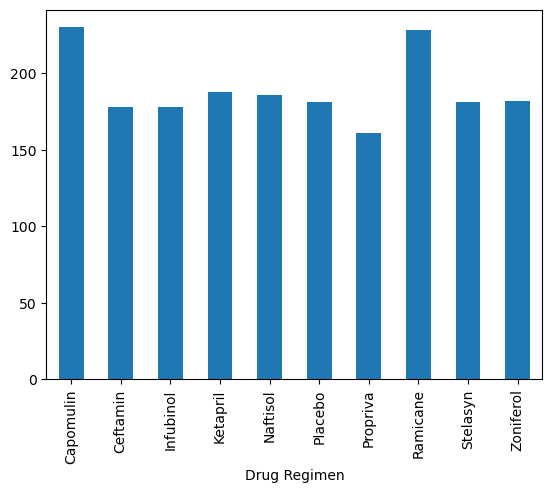

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_plot.plot(kind="bar")

<Axes: xlabel='Timepoint'>

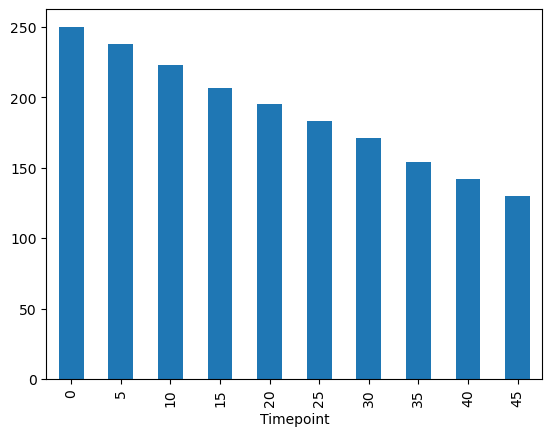

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_plot2 = combined_data.groupby(["Timepoint"]).count()["Mouse ID"]
bar_plot2.plot(kind="bar")

<Axes: ylabel='Mouse ID'>

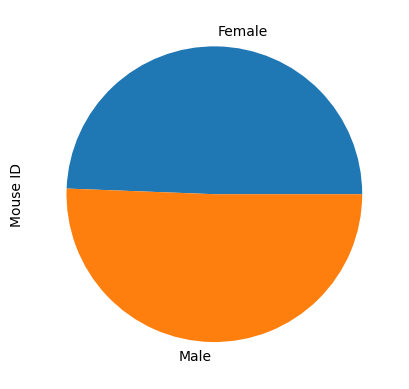

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = combined_data.groupby(["Sex"]).count()["Mouse ID"]
sex_count

sex_count.plot(kind="pie")

Text(0.5, 1.0, 'Gender Distribution')

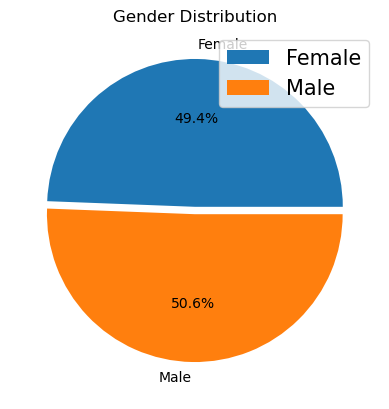

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.05, 0)
plt.pie(sex_count, explode=explode, labels=sex_count.index.values, autopct="%1.1f%%")
plt.legend(["Female", "Male"], prop={'size': 15})
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Gender Distribution')

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_time = combined_data[combined_data['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
mouse_timepoints= mouse_time.sort_values(["Timepoint"], ascending=True)
mouse_timepoints
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df= mouse_timepoints.merge(combined_data, on= ("Mouse ID", "Timepoint"), how='left')

#size of tumor at last timepoint check
size_time = mouse_timepoints[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
size_time

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [89]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ramicane_data = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane",:]
infubinol_data = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol",:]
ceftamin_data = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin",:]
capomulin_data
    # add subset 

    
    # Determine outliers using upper and lower bounds
    #capomulin merge to dataframe
capomulin_last = capomulin_data.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = capomulin_vol.merge(combined_data, on=("Mouse ID", "Timepoint"), how="left")
capomulin_merge
#calculate IQR
tum_vol = capomulin_merge['Tumor Volume (mm3)']
quartiles = tum_vol.quantile([0.25,0.5,0.75])
capomulin_lowerq = quartiles[0.25]
capomulin_upperq = quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
print(f' IQR = {capomulin_iqr}')
print(f' Lower Quartile = {capomulin_lowerq}')
print(f' Upper Quartile = {capomulin_upperq}')
capomulin_lower_bound = capomulin_lowerq - 1.5*capomulin_iqr
capomulin_upper_bound = capomulin_upperq + 1.5*capomulin_iqr
print(f' Lower Bound: {capomulin_lower_bound}')
print(f' Upper Bound: {capomulin_upper_bound}')
capomulin_merge.describe()
print(f"Potential outliers for Capomulin could be values below {capomulin_lower_bound} and above {capomulin_upper_bound}.")


#repeat for Ramicane
ramicane_last = ramicane_data.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = ramicane_vol.merge(combined_data, on=("Mouse ID", "Timepoint"), how="left")

tum_vol_1 = ramicane_merge['Tumor Volume (mm3)']
quartiles = tum_vol_1.quantile([0.25,0.5,0.75])
ramicane_lowerq = quartiles[0.25]
ramicane_upperq = quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
print(f' IQR = {ramicane_iqr}')
print(f' Lower Quartile = {ramicane_lowerq}')
print(f' Upper Quartile = {ramicane_upperq}')
ramicane_lower_bound = ramicane_lowerq - 1.5*ramicane_iqr
ramicane_upper_bound = ramicane_upperq + 1.5*ramicane_iqr
print(f' Lower Bound: {ramicane_lower_bound}')
print(f' Upper Bound: {ramicane_upper_bound}')
ramicane_merge.describe()
print(f"Potential outliers for Ramicane could be values below {ramicane_lower_bound} and above {ramicane_upper_bound}.")


#repeat for Infubinol
infubinol_last = infubinol_data.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = infubinol_vol.merge(combined_data, on=("Mouse ID", "Timepoint"), how="left")
infubinol_merge

tum_vol_2 = ramicane_merge['Tumor Volume (mm3)']
quartiles = tum_vol_2.quantile([0.25,0.5,0.75])
infubinol_lowerq = quartiles[0.25]
infubinol_upperq = quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
print(f' IQR = {infubinol_iqr}')
print(f' Lower Quartile = {infubinol_lowerq}')
print(f' Upper Quartile = {infubinol_upperq}')
infubinol_lower_bound = infubinol_lowerq - 1.5*infubinol_iqr
infubinol_upper_bound = infubinol_upperq + 1.5*infubinol_iqr
print(f' Lower Bound: {infubinol_lower_bound}')
print(f' Upper Bound: {infubinol_upper_bound}')
infubinol_merge.describe()

print(f"Potential outliers for Ramicane could be values below {infubinol_lower_bound} and above {infubinol_upper_bound}.")


#repeat for Ceftamin
ceftamin_last = ceftamin_data.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = ceftamin_vol.merge(combined_data, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_merge

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tum_vol_3 = ceftamin_merge['Tumor Volume (mm3)']
quartiles = tum_vol_3.quantile([0.25,0.5,0.75])
ceftamin_lowerq = quartiles[0.25]
ceftamin_upperq = quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
print(f' IQR = {ceftamin_iqr}')
print(f' Lower Quartile = {ceftamin_lowerq}')
print(f' Upper Quartile = {ceftamin_upperq}')
ceftamin_lower_bound = ceftamin_lowerq - 1.5*ceftamin_iqr
ceftamin_upper_bound = ceftamin_upperq + 1.5*ceftamin_iqr
print(f' Lower Bound: {ceftamin_lower_bound}')
print(f' Upper Bound: {ceftamin_upper_bound}')
ceftamin_merge.describe()
print(f"Potential outliers for Ceftamin could be values below {ceftamin_lower_bound} and above {ceftamin_upper_bound}.")



 IQR = 7.781863460000004
 Lower Quartile = 32.37735684
 Upper Quartile = 40.1592203
 Lower Bound: 20.70456164999999
 Upper Bound: 51.83201549
Potential outliers for Capomulin could be values below 20.70456164999999 and above 51.83201549.
 IQR = 9.098536719999998
 Lower Quartile = 31.56046955
 Upper Quartile = 40.65900627
 Lower Bound: 17.912664470000003
 Upper Bound: 54.30681135
Potential outliers for Ramicane could be values below 17.912664470000003 and above 54.30681135.
 IQR = 9.098536719999998
 Lower Quartile = 31.56046955
 Upper Quartile = 40.65900627
 Lower Bound: 17.912664470000003
 Upper Bound: 54.30681135
Potential outliers for Ramicane could be values below 17.912664470000003 and above 54.30681135.
 IQR = 15.577752179999997
 Lower Quartile = 48.72207785
 Upper Quartile = 64.29983003
 Lower Bound: 25.355449580000002
 Upper Bound: 87.66645829999999
Potential outliers for Ceftamin could be values below 25.355449580000002 and above 87.66645829999999.


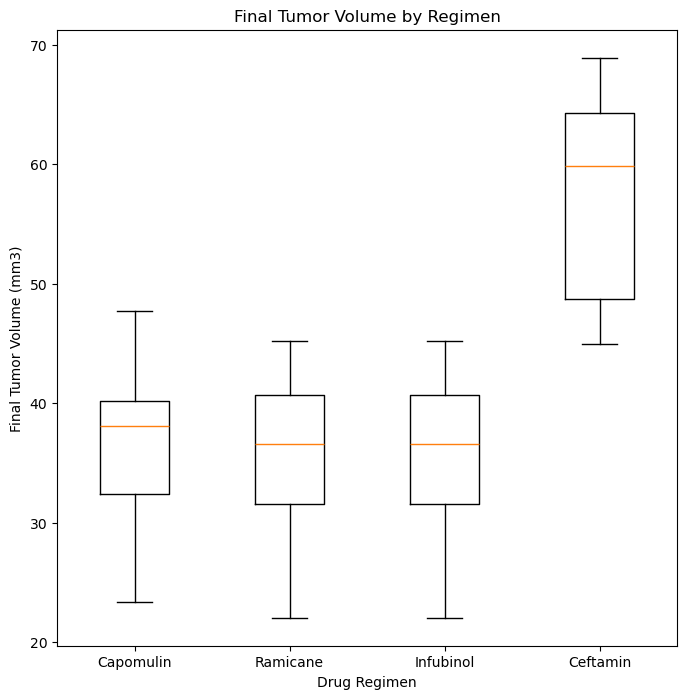

In [90]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_group_plot = [tum_vol, tum_vol_1, tum_vol_2, tum_vol_3]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(treatment_group_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

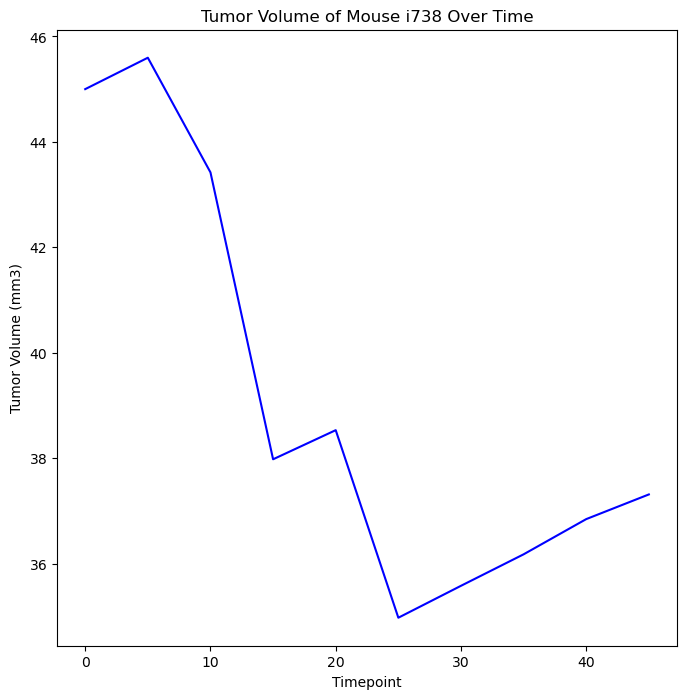

In [93]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_plot = combined_data.loc[(combined_data["Mouse ID"] == "i738")]
line_plot = mouse_plot.set_index("Timepoint")
line_plot

#Final plot
line_plot["Tumor Volume (mm3)"].plot(color = "blue")
plt.title("Tumor Volume of Mouse i738 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

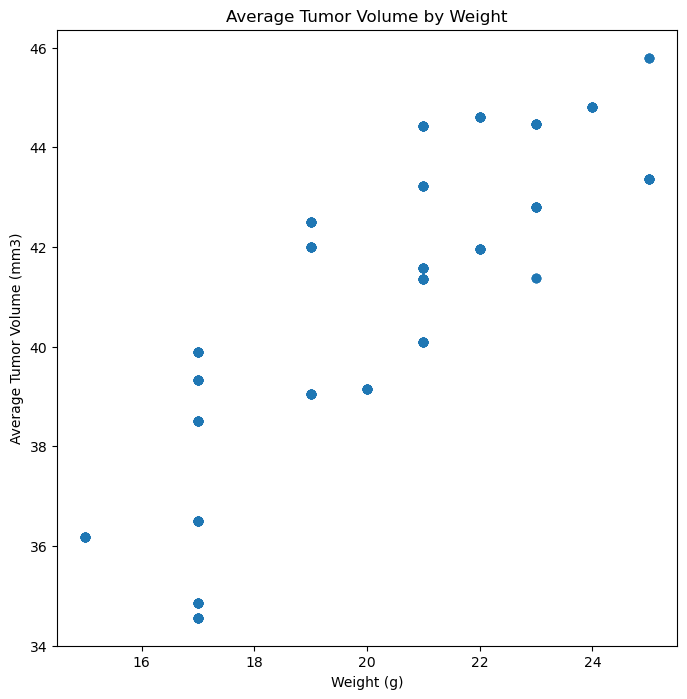

In [151]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#weight_capo = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin")]

weight_capo = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
avg_vol = pd.DataFrame(weight_capo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto comined data
avg_vol_1 = pd.merge(weight_capo, avg_vol, on='Mouse ID')

#create x and y axis
x = avg_vol_1['Weight (g)']
y = avg_vol_1['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume for mice
on the Capomulin regimen is 0.83.


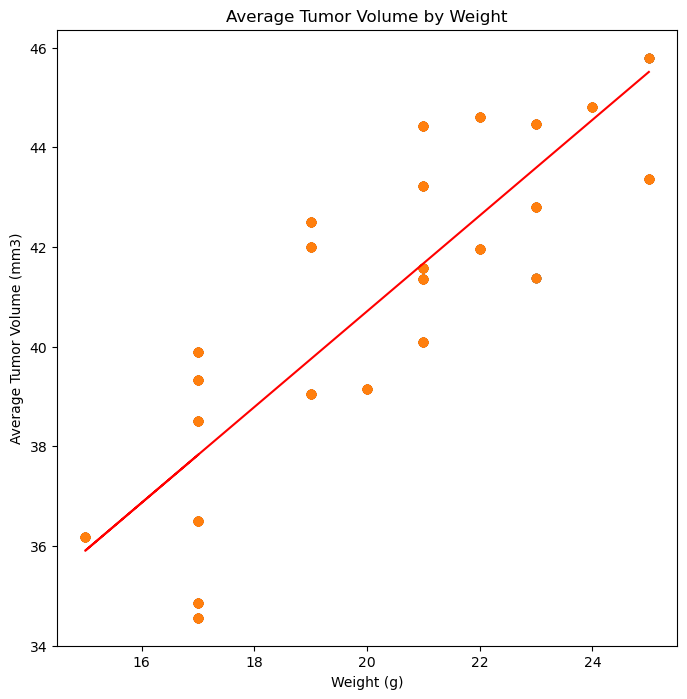

In [157]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#begin with duplicate code from above
weight_capo = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
avg_vol = pd.DataFrame(weight_capo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_1 = pd.merge(weight_capo, avg_vol, on='Mouse ID')
x = avg_vol_1['Weight (g)']
y = avg_vol_1['avg_tumor_vol']
plt.scatter(x, y)

#calculate correlation of weight and tumor volume for Capomulin
correlation= st.pearsonr(x,y)

#print response for the calculation
print(f"""The correlation between weight and average tumor volume for mice
on the Capomulin regimen is {round(correlation[0],2)}.""")

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression 
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()